In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Scraping reviews.csv')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
data.head(10)

,reviews
0,\n\n Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.\n\n
1,"\n\n\n Your browser does not support HTML5 video.\n\n\n Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter from new Apple India online store for Rs.1900I don’t judge here apple because of accessories removal and the price tag. I hope apple can justify this.I only hope and wanted to see so badly Made in India IPhones so that we all can enjoy lower priced ( at least a better priced) iPhones in the future.A big thanks to Appario Retail Pvt. Ltd and Amazon for delivering genuine iPhone as always in perfect condition. Delivered way before the promised date.Update: (01/12/2020) After testing 25 days especially on battery life of this iPhone 12, results were amazing and I’m completely satisfied with the battery performance. On Moderate gaming, Moderate Video Content, heavy on calls and heavy on browsing this iPhone 12 battery life is sufficient for your regular Day.My conclusion is definitely a better and improved battery performer than the previous iPhone model.Thank you Apple IndiaThank you Appario Retail Pvt. Ltd.Thank you Amazon India.( Note: charger brick was shown in my video was bought myself from Apple India online store because it won’t comes with the phone)\n\n"
2,"\n\n This was my first switch to an ios device after using an android untill now. And I am not disappointed. The build quality, the responsive touch, the display, the camera, the battery life are just exceptional.Been using for about 10 days now, and consistently giving around 7h of screen on time.The camera is just way too good. Espeecially the night mode impressed me a lot.Only issue when switching from Android to iPhone I encountered was to be not able to restore my whatsapp chats. There are no official/free ways for doing this.The phone is simple amazing.\n\n"
3,\n\n Nicely packed !! Kudos to seller !!I was very much confused between iphone 11 and this one as the price of iphone dropped ... But i am glad i chose this over iphone 11.1.Display:Main upgrade in iphone 12 is the oled display. Boy o boy the screen is amazing. I have user many android flagship's but this beats them all.2.Battery:Battery is amazing. I am getting 1.5 days of battery life with my usage.PS: i dont play games.3.IOS:This is my 1st iphone and the experience with ios is great ... Very smooth animations ..even though its not 90hz screen but everything is buttery smooth.4. Camera:The pics from this phone is superb. FLAGSHIP LEVEL CAMERA! You will not be dissapointed.5 Build &Design :This phone looks and feels very premium compared to other phones.Very comfotable to use.6.Face Id:Face id works very fast and accurate in low lighting conditions.7.Updates:Ios14 is good and we can expect another 4yrs of software updates thats huge !Cons:1.Priced very high but it may be because of high taxes and custom duty.2.No charger and earpods in the box.3.Notifications are a mess ...android is better in managing new notifications.Overall a great Phone IF You are OK with the Price !!!\n\n

In [5]:
df=data.copy() # Creating a copy of the original data

### Cleaning the Reviews

In [6]:
#All the reviews have '\n' at the end. Let's remove it

df['reviews']=df['reviews'].apply(lambda x:x.strip('\n'))

In [7]:
df.head(5)

,reviews
0,Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.
1,"Your browser does not support HTML5 video.\n\n\n Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter from new Apple India online store for Rs.1900I don’t judge here apple because of accessories removal and the price tag. I hope apple can justify this.I only hope and wanted to see so badly Made in India IPhones so that we all can enjoy lower priced ( at least a better priced) iPhones in the future.A big thanks to Appario Retail Pvt. Ltd and Amazon for delivering genuine iPhone as always in perfect condition. Delivered way before the promised date.Update: (01/12/2020) After testing 25 days especially on battery life of this iPhone 12, results were amazing and I’m completely satisfied with the battery performance. On Moderate gaming, Moderate Video Content, heavy on calls and heavy on browsing this iPhone 12 battery life is sufficient for your regular Day.My conclusion is definitely a better and improved battery performer than the previous iPhone model.Thank you Apple IndiaThank you Appario Retail Pvt. Ltd.Thank you Amazon India.( Note: charger brick was shown in my video was bought myself from Apple India online store because it won’t comes with the phone)"
2,"This was my first switch to an ios device after using an android untill now. And I am not disappointed. The build quality, the responsive touch, the display, the camera, the battery life are just exceptional.Been using for about 10 days now, and consistently giving around 7h of screen on time.The camera is just way too good. Espeecially the night mode impressed me a lot.Only issue when switching from Android to iPhone I encountered was to be not able to restore my whatsapp chats. There are no official/free ways for doing this.The phone is simple amazing."
3,Nicely packed !! Kudos to seller !!I was very much confused between iphone 11 and this one as the price of iphone dropped ... But i am glad i chose this over iphone 11.1.Display:Main upgrade in iphone 12 is the oled display. Boy o boy the screen is amazing. I have user many android flagship's but this beats them all.2.Battery:Battery is amazing. I am getting 1.5 days of battery life with my usage.PS: i dont play games.3.IOS:This is my 1st iphone and the experience with ios is great ... Very smooth animations ..even though its not 90hz screen but everything is buttery smooth.4. Camera:The pics from this phone is superb. FLAGSHIP LEVEL CAMERA! You will not be dissapointed.5 Build &Design :This phone looks and feels very premium compared to other phones.Very comfotable to use.6.Face Id:Face id works very fast and accurate in low lighting conditions.7.Updates:Ios14 is good and we can expect another 4yrs of software updates thats huge !Cons:1.Priced very high but it may be because of high taxes and custom duty.2.No charger and earpods in the box.3.Notifications are a mess ...android is better in managing new notifications.Overall a great Phone IF You are OK with the Price !!!
4,"Sold kidney bought this, now not f

In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [9]:
STOPWORDS = stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [10]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [11]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [12]:
df.head(5)

,reviews,cleaned_reviews
0,Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.,worst batteri performanceiphon 11 far better den thisin 4 hour batteri come 100 15 percentpleas dont buy product price
1,"Your browser does not support HTML5 video.\n\n\n Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter from new Apple India online store for Rs.1900I don’t judge here apple because of accessories removal and the price tag. I hope apple can justify this.I only hope and wanted to see so badly Made in India IPhones so that we all can enjoy lower priced ( at least a better priced) iPhones in the future.A big thanks to Appario Retail Pvt. Ltd and Amazon for delivering genuine iPhone as always in perfect condition. Delivered way before the promised date.Update: (01/12/2020) After testing 25 days especially on battery life of this iPhone 12, results were amazing and I’m completely satisfied with the battery performance. On Moderate gaming, Moderate Video Content, heavy on calls and heavy on browsing this iPhone 12 battery life is sufficient for your regular Day.My conclusion is definitely a better and improved battery performer than the previous iPhone model.Thank you Apple IndiaThank you Appario Retail Pvt. Ltd.Thank you Amazon India.( Note: charger brick was shown in my video was bought myself from Apple India online store because it won’t comes with the phone)",browser support html5 video\n\n\n anoth beauti appl upgrad iphon x great experi latest spec flawlessli smooth thank new a14 bionic chipbuild qualiti great alway applephon feel light hand due aluminium bodi chose blue colour want go differ colour routin black white iphon initi bit skeptic see phone person i’m happi blue colour “ bad flashy”grip feel perfect phone come io 141 camera qualiti excel suffici normal userif io ecosystem noth go wrong herether noth question qualiti interfac appl it’ person opinion long time appl usera know iphon 12 won’t come earphon charg brick adapteri bought separ 20w appl adapt new appl india onlin store rs1900i don’t judg appl accessori remov price tag hope appl justifi thisi hope want see badli made india iphon enjoy lower price least better price iphon futurea big thank appario retail pvt ltd amazon deliv genuin iphon alway perfect condit deliv way promis dateupd 01122020 test 25 day especi batteri life iphon 12 result amaz i’m complet satisfi batteri perform moder game moder video content heavi call heavi brows iphon 12 batteri life suffici regular daymi conclus definit better improv batteri perform previou iphon modelthank appl indiathank appario retail pvt ltdthank amazon india note charger brick shown video bought appl india onlin store won’t come phone
2,"This was my first switch to an ios device after using an android untill now. And I am not disappointed. The build quality, the responsive touch, the display, the camera, the battery life are just exceptional.Been using for about 10 days now, and consistently giving around 7h of screen on time.The camera is just way too good. Espeecially the nig

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

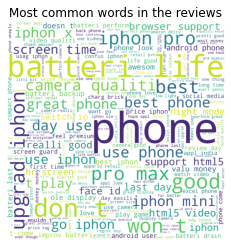

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [16]:
#Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [17]:
# Defining a function to extract only the compound score.

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [18]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [19]:
df.head(5)

,reviews,cleaned_reviews,sentiment_score
0,Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.,worst batteri performanceiphon 11 far better den thisin 4 hour batteri come 100 15 percentpleas dont buy product price,-0.2960
1,"Your browser does not support HTML5 video.\n\n\n Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter from new Apple India online store for Rs.1900I don’t judge here apple because of accessories removal and the price tag. I hope apple can justify this.I only hope and wanted to see so badly Made in India IPhones so that we all can enjoy lower priced ( at least a better priced) iPhones in the future.A big thanks to Appario Retail Pvt. Ltd and Amazon for delivering genuine iPhone as always in perfect condition. Delivered way before the promised date.Update: (01/12/2020) After testing 25 days especially on battery life of this iPhone 12, results were amazing and I’m completely satisfied with the battery performance. On Moderate gaming, Moderate Video Content, heavy on calls and heavy on browsing this iPhone 12 battery life is sufficient for your regular Day.My conclusion is definitely a better and improved battery performer than the previous iPhone model.Thank you Apple IndiaThank you Appario Retail Pvt. Ltd.Thank you Amazon India.( Note: charger brick was shown in my video was bought myself from Apple India online store because it won’t comes with the phone)",browser support html5 video\n\n\n anoth beauti appl upgrad iphon x great experi latest spec flawlessli smooth thank new a14 bionic chipbuild qualiti great alway applephon feel light hand due aluminium bodi chose blue colour want go differ colour routin black white iphon initi bit skeptic see phone person i’m happi blue colour “ bad flashy”grip feel perfect phone come io 141 camera qualiti excel suffici normal userif io ecosystem noth go wrong herether noth question qualiti interfac appl it’ person opinion long time appl usera know iphon 12 won’t come earphon charg brick adapteri bought separ 20w appl adapt new appl india onlin store rs1900i don’t judg appl accessori remov price tag hope appl justifi thisi hope want see badli made india iphon enjoy lower price least better price iphon futurea big thank appario retail pvt ltd amazon deliv genuin iphon alway perfect condit deliv way promis dateupd 01122020 test 25 day especi batteri life iphon 12 result amaz i’m complet satisfi batteri perform moder game moder video content heavi call heavi brows iphon 12 batteri life suffici regular daymi conclus definit better improv batteri perform previou iphon modelthank appl indiathank appario retail pvt ltdthank amazon india note charger brick shown video bought appl india onlin store won’t come phone,0.9975
2,"This was my first switch to an ios device after using an android untill now. And I am not disappointed. The build quality, the responsive touch, the display, the camera, the battery life are just exceptional.Been using for about 10 days now, and consistently giving around 7h of screen on time.The camera is just wa

In [20]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [21]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [22]:
df.head(20)

,reviews,cleaned_reviews,sentiment_score,review_category
0,Worst battery performance.Iphone 11 is far better den this..In 4 hour battery will come down from 100 to 15 percent.Please dont buy this product at this price.,worst batteri performanceiphon 11 far better den thisin 4 hour batteri come 100 15 percentpleas dont buy product price,-0.2960,negative
1,"Your browser does not support HTML5 video.\n\n\n Another beauty from Apple. I was upgraded from iPhone X and it was great experience with all the latest specs and flawlessly smooth. Thanks to all new A14 Bionic chip.Build quality was great as always from Apple.Phone feels light on hands due to aluminium body. I chose Blue colour because wanted to go for different colour than routine Black and white iPhones so initially I was bit skeptical but after seeing the phone in person I’m happy with the blue colour “ not bad at all and not too flashy”Grip and feel perfect. Phone comes with iOS 14.1. Camera quality was excellent and sufficient as a normal user.If you are from iOS ecosystem nothing will go wrong here.There is nothing to question about the quality and interface from Apple ( it’s my personal opinion as a long time apple user)As you all know iPhone 12 won’t comes with earphones and charging brick( adapter)I bought separately 20w apple adapter from new Apple India online store for Rs.1900I don’t judge here apple because of accessories removal and the price tag. I hope apple can justify this.I only hope and wanted to see so badly Made in India IPhones so that we all can enjoy lower priced ( at least a better priced) iPhones in the future.A big thanks to Appario Retail Pvt. Ltd and Amazon for delivering genuine iPhone as always in perfect condition. Delivered way before the promised date.Update: (01/12/2020) After testing 25 days especially on battery life of this iPhone 12, results were amazing and I’m completely satisfied with the battery performance. On Moderate gaming, Moderate Video Content, heavy on calls and heavy on browsing this iPhone 12 battery life is sufficient for your regular Day.My conclusion is definitely a better and improved battery performer than the previous iPhone model.Thank you Apple IndiaThank you Appario Retail Pvt. Ltd.Thank you Amazon India.( Note: charger brick was shown in my video was bought myself from Apple India online store because it won’t comes with the phone)",browser support html5 video\n\n\n anoth beauti appl upgrad iphon x great experi latest spec flawlessli smooth thank new a14 bionic chipbuild qualiti great alway applephon feel light hand due aluminium bodi chose blue colour want go differ colour routin black white iphon initi bit skeptic see phone person i’m happi blue colour “ bad flashy”grip feel perfect phone come io 141 camera qualiti excel suffici normal userif io ecosystem noth go wrong herether noth question qualiti interfac appl it’ person opinion long time appl usera know iphon 12 won’t come earphon charg brick adapteri bought separ 20w appl adapt new appl india onlin store rs1900i don’t judg appl accessori remov price tag hope appl justifi thisi hope want see badli made india iphon enjoy lower price least better price iphon futurea big thank appario retail pvt ltd amazon deliv genuin iphon alway perfect condit deliv way promis dateupd 01122020 test 25 day especi batteri life iphon 12 result amaz i’m complet satisfi batteri perform moder game moder video content heavi call heavi brows iphon 12 batteri life suffici regular daymi conclus definit better improv batteri perform previou iphon modelthank appl indiathank appario retail pvt ltdthank amazon india note charger brick shown video bought appl india onlin store won’t come phone,0.9975,positive
2,"This was my first switch to an ios device after using an android untill now. And I am not disappointed. The build quality, the responsive touch, the display, the camera, the battery life are just exceptional.Been using for about 10 days now, and consistently giving around 7h of sc

Text(0.5, 1.0, 'Distribution of Reviews Category')

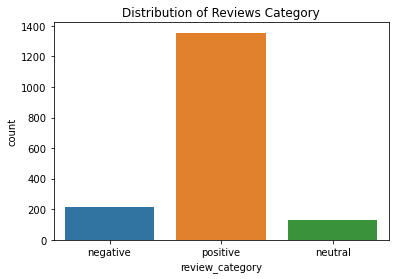

In [23]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [24]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

[' browser support html5 video\n\n\n \xa0anoth beauti appl upgrad iphon x great experi latest spec flawlessli smooth thank new a14 bionic chipbuild qualiti great alway applephon feel light hand due aluminium bodi chose blue colour want go differ colour routin black white iphon initi bit skeptic see phone person i’m happi blue colour “ bad flashy”grip feel perfect phone come io 141 camera qualiti excel suffici normal userif io ecosystem noth go wrong herether noth question qualiti interfac appl it’ person opinion long time appl usera know iphon 12 won’t come earphon charg brick adapteri bought separ 20w appl adapt new appl india onlin store rs1900i don’t judg appl accessori remov price tag hope appl justifi thisi hope want see badli made india iphon enjoy lower price least better price iphon futurea big thank appario retail pvt ltd amazon deliv genuin iphon alway perfect condit deliv way promis dateupd 01122020 test 25 day especi batteri life iphon 12 result amaz i’m complet satisfi bat

In [25]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

[' worst batteri performanceiphon 11 far better den thisin 4 hour batteri come 100 15 percentpleas dont buy product price',
 ' worst batteri performanceiphon 11 far better den thisin 4 hour batteri come 100 15 percentpleas dont buy product price',
 ' extrem disappoint phone it’ seemingli averag phone price 4 5 time least phone joke comparison samsung flagship phone shock mani fool like fall apple’ trickeri gimmickryth batteri doesn’t last half day screen size averag thick phone constantli remind phone belong anoth era 64gb space won’t enough anyoneand appl quirk won’t come sd card won’t come charg brick set head phone headphon regular audio pin won’t work one face id won’t work mask forc remov mask you’r vulner phone won’t allow set googl map default continu suffer use appl map bet even tim cook doesn’t use won’t abl set googl chrome default browser io won’t let youoveral phone overpr overr anybodi half wit figur phone joke mere market gimmick ordinari phone like shouldn’t cost 12 14ka

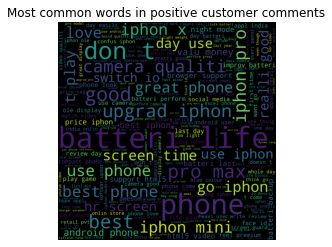

In [26]:
# Generating WordCloud For Positive Reviews

from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

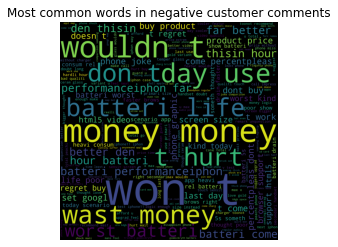

In [27]:
# Generating WordCloud for Negative Reviews

from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

## Unigrams

In [28]:
from collections import Counter

In [29]:
# Defining a function to get the most common words

def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [30]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [31]:
top_20_positive_review_words

[('', 1421),
 ('phone', 1189),
 ('iphon', 1140),
 ('batteri', 845),
 ('good', 578),
 ('use', 504),
 ('12', 503),
 ('camera', 485),
 ('appl', 387),
 ('day', 355),
 ('screen', 305),
 ('go', 298),
 ('life', 292),
 ('one', 287),
 ('best', 284),
 ('great', 279),
 ('display', 252),
 ('time', 250),
 ('price', 241),
 ('look', 232)]

In [32]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [33]:
top_20_negative_review_words

[('', 214),
 ('phone', 171),
 ('iphon', 103),
 ('batteri', 82),
 ('use', 80),
 ('day', 65),
 ('won’t', 64),
 ('buy', 60),
 ('money', 56),
 ('screen', 50),
 ('12', 47),
 ('worst', 41),
 ('work', 39),
 ('like', 38),
 ('appl', 35),
 ('u', 35),
 ('come', 34),
 ('price', 34),
 ('it’', 34),
 ('last', 33)]

In [34]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

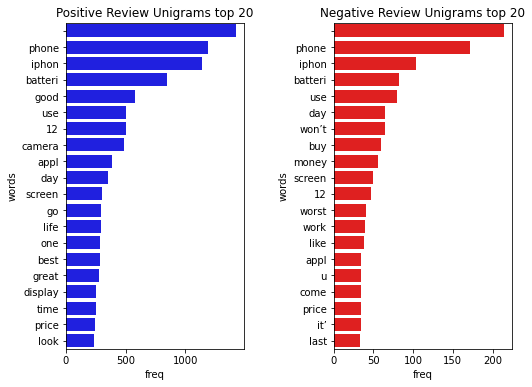

In [35]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

## Bigrams
Bigrams are a combination of 2 words

In [36]:
# Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.

def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [37]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

In [38]:
positive_reviews_bigrams[:5]

['_browser browser_support support_html5 html5_video\n\n\n video\n\n\n_\xa0anoth \xa0anoth_beauti beauti_appl appl_upgrad upgrad_iphon iphon_x x_great great_experi experi_latest latest_spec spec_flawlessli flawlessli_smooth smooth_thank thank_new new_a14 a14_bionic bionic_chipbuild chipbuild_qualiti qualiti_great great_alway alway_applephon applephon_feel feel_light light_hand hand_due due_aluminium aluminium_bodi bodi_chose chose_blue blue_colour colour_want want_go go_differ differ_colour colour_routin routin_black black_white white_iphon iphon_initi initi_bit bit_skeptic skeptic_see see_phone phone_person person_i’m i’m_happi happi_blue blue_colour colour_“ “_bad bad_flashy”grip flashy”grip_feel feel_perfect perfect_phone phone_come come_io io_141 141_camera camera_qualiti qualiti_excel excel_suffici suffici_normal normal_userif userif_io io_ecosystem ecosystem_noth noth_go go_wrong wrong_herether herether_noth noth_question question_qualiti qualiti_interfac interfac_appl appl_it’ i

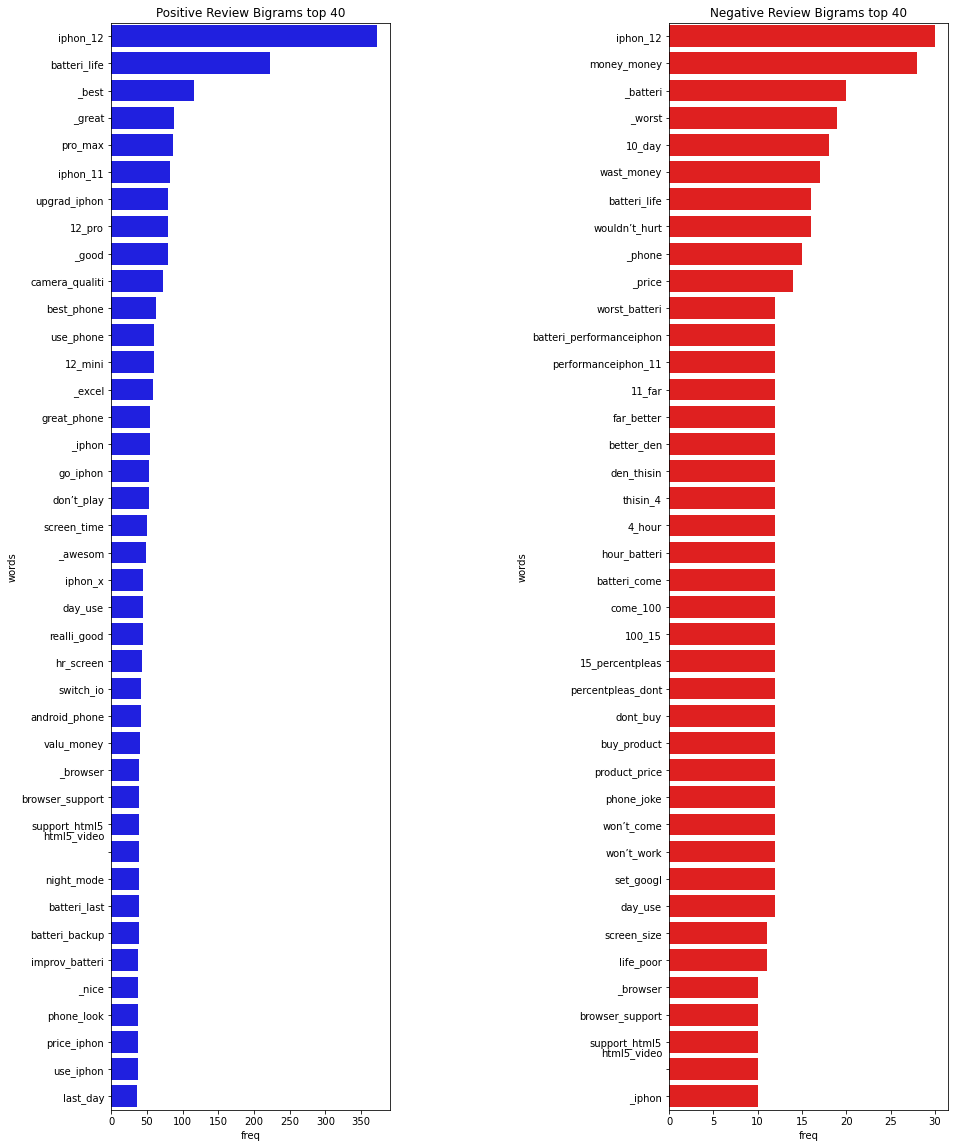

In [39]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])
